<a href="https://colab.research.google.com/github/SAnand2903/Framingham-Dataset_Predicting-Heart-Disease_EDA/blob/main/Heart_Disease_Predictor_Framingham_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BA780-Assignment 3 Heart Disease Predictor-Framingham-EDA**##

---



---





# **Table of Contents**

> 1. Objective

> 2. Description of Dataset

> 3. Exploratory Phase
             * 3.1 Handling Missing values
             * 3.2 Correlation Matrix
            
> 4. Visualizations for Analysis
             * 4.1 For categorical variable
             * 4.2 For numerical variable

> 5. Summary of key observations





##**1. Objective**##
---
The objective is to predict the 10-yrs risk of coronary heart disease, based on the data provided. The Framingham dataset provides the paitents information and major attributes.








In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Framingham.csv to Framingham (1).csv
User uploaded file "Framingham (1).csv" with length 191803 bytes


In [ ]:
df=pd.read_csv('/content/Framingham.csv')

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## **2. Description of Dataset**

---


##Data information##
*   **Male:** To identify the sex 1: Male and 0: Female (Categorical feature)
*   **Age:** To identify the age (Numerical feature)
*   **Education:** To identify the level of education as 1,2,3 or 4 (Categorical feature)
*   **currentSmoker:** To identify the smoker status whether 1: yes or 0: no (Categorical feature)
*   **cigsPerDay:** To identify the number of cigarettes per day (Numerical feature)
*   **BPMeds:** To identify if BP Meds are taken or not 1: yes or 0: no (Categorical feature)
*   **prevalentStroke:** To identify if the patient suffers from strokes or not 1: yes or 0: no (Categorical feature)
*   **prevalentHyp:** To identify if the patient suffers from hypertension or not 1: yes or 0: no (Categorical feature)
*   **diabetes:** To identify if the patient suffers from diabetes or not 1: yes or 0: no (Categorical feature)
*   **totChol:** To identify the cholestrol level (Numerical feature)
*   **sysBP:** To identify the systolic blood pressure (Numerical feature)
*   **diaBP:** To identify the Diastolic Blood Pressure (Numerical feature)
*   **BMI:** To identify the Body Mass Index (Numerical feature)
*   **heartRate:** To identify the heart rate (Numerical feature)
*   **glucose:** To identify the glucose level (Numerical feature)
*   **TenYearCHD:** To identify the risk of 10-year risk of future coronary heart disease 1: yes or 0: no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


##Basic information##


*   The dataset has 4240 rows and 16 columns
*   There are total 645 missing values (as evidenced below)


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## **3. Exploratory Phase**##


---





##3.1 Handling Missing Values##
* In the 'BPMeds' column, the missing values are specified as 'N/A'. In this particular category it can be assumed that 'N/A' implies that the person corresponding to this entry doesn't take any BP medicines and therefore the values can be imputed by 0.
* As there are signifcant number of values missing in the 'glucose' column, therefore they cannot be dropped. It can be imputed by the mean.
* As the null values in the rest of the columns aren't too many, they can be dropped as imputing them could hamper the analysis.

In [ ]:
df['BPMeds']=df['BPMeds'].fillna(0)

In [ ]:
#BPMeds is a categorical variable so its datatype should be integer
df['BPMeds']=df['BPMeds'].astype(int)

In [ ]:
df["glucose"]=df["glucose"].fillna((df["glucose"].mean()))

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##3.2 Correlation between features##

Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

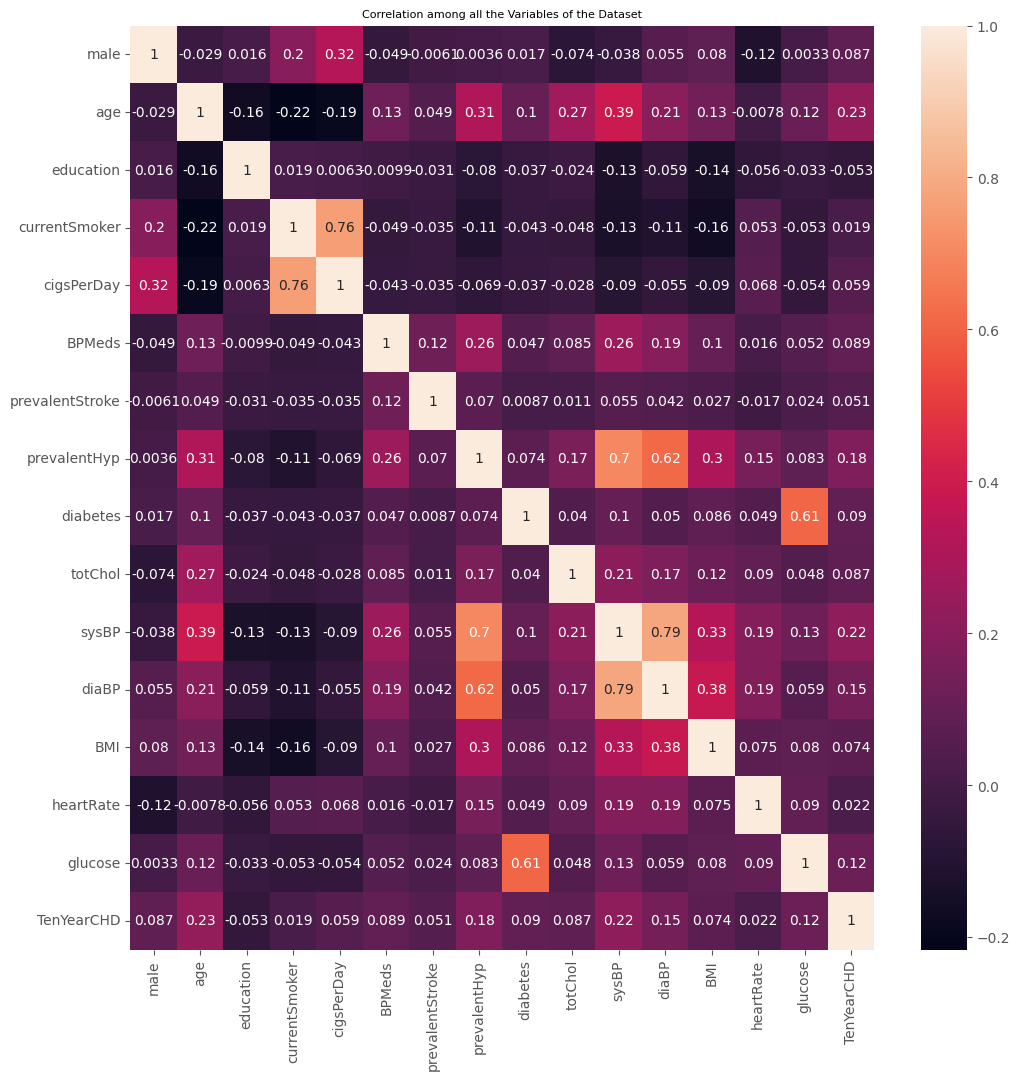

In [ ]:
cor=df.corr()
plt.figure(figsize=(12,12), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=8)

##Key observations from Correlation Matrix##
* Education and the Target variable, 'TenYearCHD' are negatively correlated. This implies that there is no signicant relation between the two and the education column can be dropped from the analysis.
* Among the categorical variables, 'male', 'prevalentStroke'and 'prevalentHyp' are relatively more correlated with the target variable.
* Among the numerical variables, 'age', 'sysBP' and 'diaBP' are relatively more correlated with the target variable.

In [ ]:
df=df.drop('education',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4068 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4068 non-null   int64  
 1   age              4068 non-null   int64  
 2   currentSmoker    4068 non-null   int64  
 3   cigsPerDay       4068 non-null   float64
 4   BPMeds           4068 non-null   int64  
 5   prevalentStroke  4068 non-null   int64  
 6   prevalentHyp     4068 non-null   int64  
 7   diabetes         4068 non-null   int64  
 8   totChol          4068 non-null   float64
 9   sysBP            4068 non-null   float64
 10  diaBP            4068 non-null   float64
 11  BMI              4068 non-null   float64
 12  heartRate        4068 non-null   float64
 13  glucose          4068 non-null   float64
 14  TenYearCHD       4068 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 508.5 KB


##Checking for duplicated values in the dataframe##

In [ ]:
df.duplicated().sum()

0

##Statistical inference##
It can be seen that there aren't any null values left in the dataset.

In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,0.431662,49.517207,0.493609,8.953048,0.028761,0.005654,0.310718,0.025320,236.704277,132.307030,82.889749,25.770393,75.890118,81.882691,0.149459
std,0.495369,8.537336,0.500021,11.904195,0.167155,0.074989,0.462844,0.157113,44.177952,21.992622,11.924114,4.080383,12.063086,22.772193,0.356584
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.050000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.365000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.982500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## **4. Exploratory Phase**##


---



##Target Variable##

We're trying to predict if the person will get coronary heart disease, with a binary classification denoted by the column TenYearCHD. To check the spread of 'yes' or 'no', the corresponding column can be plotted. \
It can be seen that the binary classification is imbalanced with more tilt on the 0 or the yes side, thereby depicting that the chance of getting CHD is quite high.


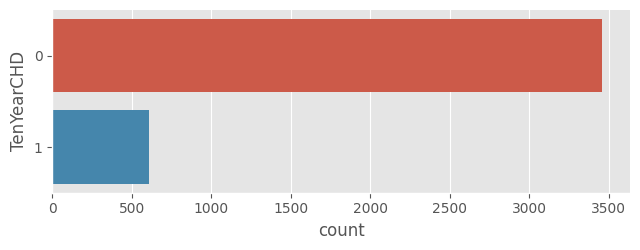

In [ ]:
ax = sns.catplot(y="TenYearCHD", kind="count", data=df, height=2.6, aspect=2.5)


##4.1 Visualizations for Categorical Variables##
The categorical variables are:
* male
* currentSmoker
* BPMeds
* prevalentStroke
* prevalentHyp
* diabetes

**Analyzing how sex is related to the onset of CHD**

In [ ]:
#Grouping the dataset by the 'male' column and then analyzing its correspondence with the target variable
d1=df.groupby('male')['TenYearCHD'].value_counts().unstack(fill_value=0)
d1

TenYearCHD,0,1
male,,
0,2029,283
1,1431,325


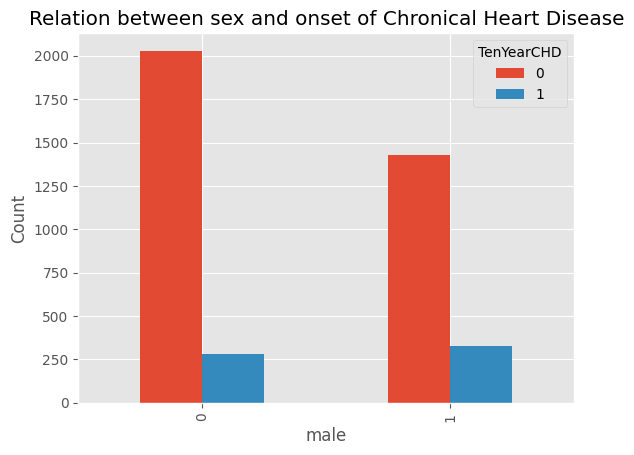

In [ ]:
plt.style.use('ggplot')
d1.plot(kind='bar')
plt.title('Relation between sex and onset of Chronical Heart Disease')
plt.ylabel('Count')
plt.show()

From the graph it can be analyzed that:


*   The males and females (male=0) that have 10 year CHD are almost the same with male being slightly more.
*   Females (male=0) that do not have CHD are higher in number than the males that do not have CHD.



**Analyzing how prevalent stroke & prevalent hypertension are related to CHD**

In [ ]:
#Grouping by prevalentStroke
PS=df.groupby('prevalentStroke')['TenYearCHD'].value_counts().unstack(fill_value=0)
PS

TenYearCHD,0,1
prevalentStroke,,
0,3446,599
1,14,9


In [ ]:
#Grouping by prevalentHyp
PH=df.groupby('prevalentHyp')['TenYearCHD'].value_counts().unstack(fill_value=0)
PH

TenYearCHD,0,1
prevalentHyp,,
0,2504,300
1,956,308


Text(0.5, 1.0, 'Prevalent Hypertension')

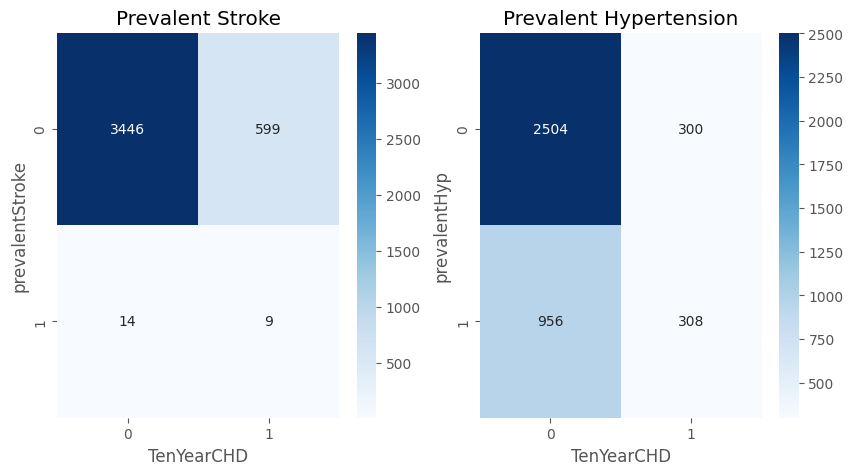

In [ ]:
#Plotting the two side by side for deeper analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.flatten()
sns.heatmap(PS, annot=True, fmt='d', cmap='Blues', cbar=True,ax=axes[0])
axes[0].set_title('Prevalent Stroke')
sns.heatmap(PH, annot=True, fmt='d', cmap='Blues', cbar=True,ax=axes[1])
axes[1].set_title('Prevalent Hypertension')

From the graph it can be analyzed that:



*   Stroke or Hypertension is not indicative of CHD



##4.2 Visualizations for Numerical Variables##
The numerical variables are:
* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

**Analyzing how age is related to CHD**

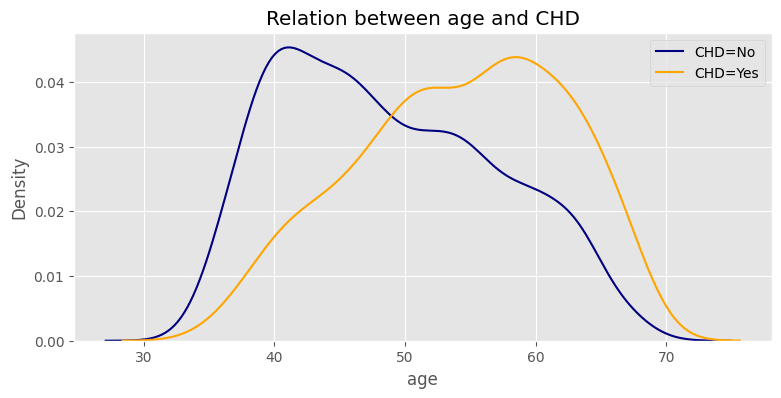

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("Relation between age and CHD")
ax0 = sns.kdeplot(df[df['TenYearCHD'] == 0]['age'], color= 'navy', label= 'CHD=No')
ax1 = sns.kdeplot(df[df['TenYearCHD'] == 1]['age'], color= 'orange',label= 'CHD=Yes')
plt.legend();

*   The graph shows that people in the age bracket of 52-63 have a higher rate of having CHD.



**Analyzing how sysBP and diaBP are related to CHD**

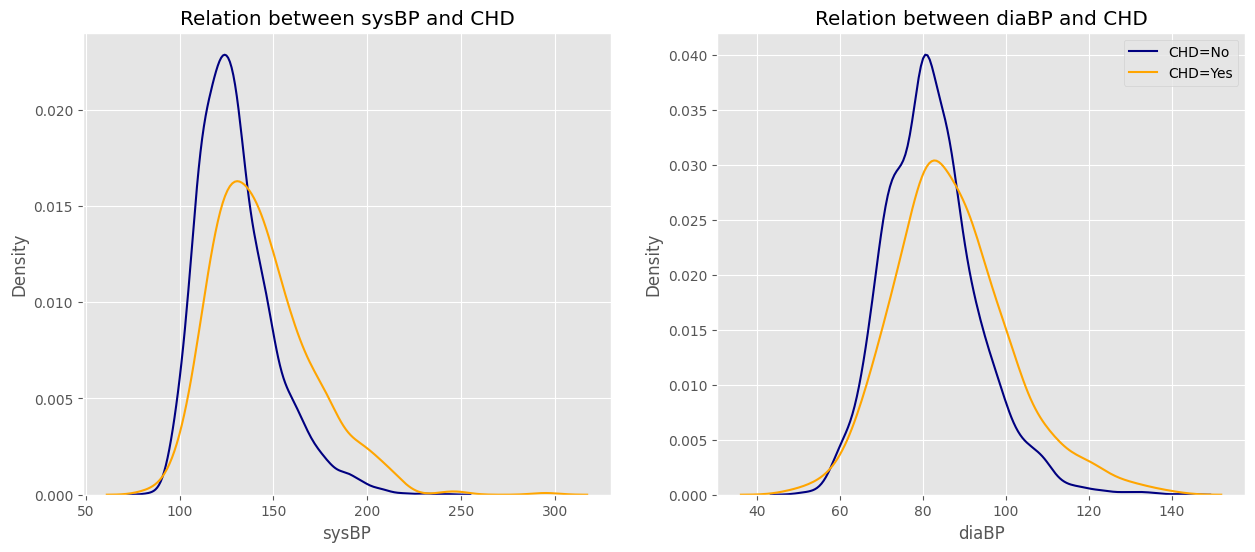

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax0 = sns.kdeplot(df[df['TenYearCHD'] == 0]['sysBP'], color= 'navy', label= 'CHD=No',ax=axes[0])
ax1 = sns.kdeplot(df[df['TenYearCHD'] == 1]['sysBP'], color= 'orange',label= 'CHD=Yes',ax=axes[0])
axes[0].set_title('Relation between sysBP and CHD')
ax0 = sns.kdeplot(df[df['TenYearCHD'] == 0]['diaBP'], color= 'navy', label= 'CHD=No',ax=axes[1])
ax1 = sns.kdeplot(df[df['TenYearCHD'] == 1]['diaBP'], color= 'orange',label= 'CHD=Yes',ax=axes[1])
axes[1].set_title('Relation between diaBP and CHD')
plt.legend();



*   Those who have sysBP between 120 and 150 have a higher rate of having CHD.
*   Those who have diaBP between 78 and 90 have a higher rate of having CHD.



## **5. Summary of key observations**

---


The dataset has a strong correlation with age, sex, diastolic blood pressure, systolic blood pressure and the target variable. However, there is no correlation between education and the target variable.
Primarily, age and BP does affect the onset of the chronical heart disease.